Importing all the necessary **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics


**Data** Collection



In [ ]:
from google.colab import drive
#mount korte hobe
#mouting from LAB 5 -
#drive.mount('/content/drive')
gold_data = pd.read_csv('/content/drive/MyDrive/SA-LS/CSE422 - Project /gold_price_data.csv')



In [ ]:
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#data describe korbo then positive negative correlation compare korbo, lastly data split and compare with 4 models

#TO BE CONTINUED

In [ ]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

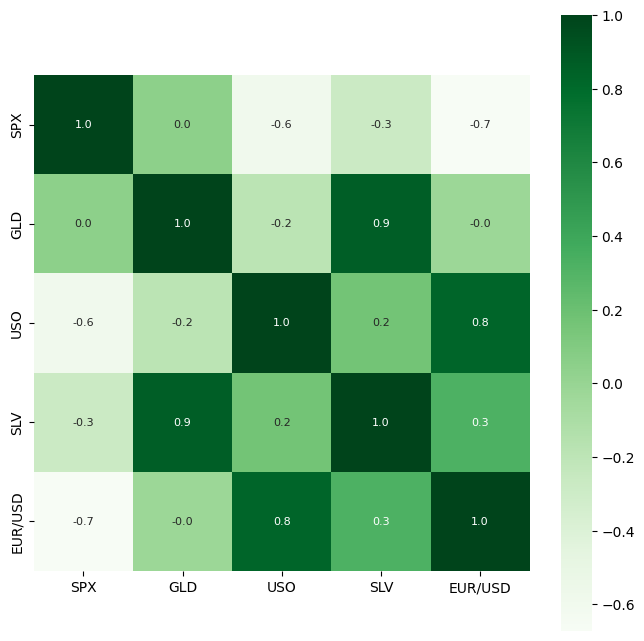

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

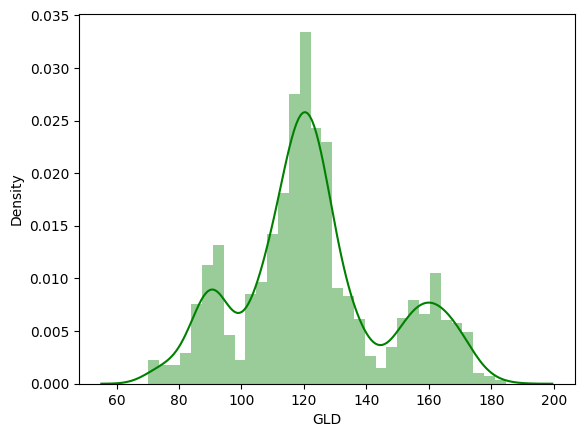

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#not this part
from sklearn.model_selection import train_test_split


In [ ]:
#x train, y train korbo erpore model gula predict korabo finally error check diye plot korabo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [ ]:
X_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [ ]:
import sklearn
brand_features = gold_data[['SPX','USO','SLV','EUR/USD']]
x= brand_features.iloc[:,:-1] #selecting rows and columns from a Panda DataFrame using iloc
y= brand_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,train,y_test = train_test_split(x,y,test_size= 0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train,y_train)
y_pd= lreg.predict(x_test)

NameError: ignored

In [ ]:
sklearn.metrices.accuracy_score(y_test,y_pd) #ekta accuracy rate ashbe which will indicate the parcentage of possible accurate result

AttributeError: ignored

In [ ]:
from sklearn.metrices import confusion_matrix #usage to evaluate the quality of the output of a classifier on the data set
set_mat = confusion_matrix(y_test,y_pd)
cnfs_matrix= pd.DataFrame(data=set_mat,columns=['assumed=0','assumed=1'],idx= ['real=0','real=1'])
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens' )


ModuleNotFoundError: ignored